In [1]:
import pandas as pd
# import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Stage 1: Data validation and Cleaning

In [2]:
listing_df = pd.read_csv("data/Listings.csv", sep=",", encoding="latin1", low_memory=False)

In [3]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [4]:
listing_df.shape

(279712, 33)

In [17]:
listing_df.sample(n=5)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
277669,34404221,Appartement agreable avec vue sur la Tour Eiffel,37896840,2015-07-08,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,5,100.0,10.0,10.0,10.0,9.0,10.0,10.0,f
95551,34445506,NEAR AIRPORT close to havaist 5m,43997406,2015-09-12,"Istanbul, Istanbul, Turkey",within an hour,1.0,1.00,f,1.0,...,1,1125,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t
63928,44103053,"Mazyte, a cuatro cuadras ÃÂngel de la Indepe...",291477094,2019-09-03,"Mexico City, Mexico City, Mexico",within an hour,1.0,0.97,f,0.0,...,5,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
247700,12956065,Excellent Apartment at Leblon!,10607843,2013-12-13,"Rio de Janeiro, State of Rio de Janeiro, Brazil",within an hour,1.0,1.00,t,8.0,...,5,90,99.0,10.0,10.0,10.0,10.0,10.0,9.0,t
46668,36414084,NEW LUXURY CONDO SILOM,242634458,2019-02-12,"Bangkok, Thailand",a few days or more,0.0,NaN,f,5.0,...,1,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [6]:
listing_df.isna().sum()

listing_id                          0
name                              175
host_id                             0
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                        29435
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating            91405
review_score

In [68]:
listing_df[["neighbourhood", "minimum_nights", "property_type", "accommodates", "bedrooms", "price"]].sample(10)

,neighbourhood,minimum_nights,property_type,accommodates,bedrooms,price
59762,Chelsea,2,Entire apartment,4,2.0,87
122479,Woodside,30,Private room in apartment,3,1.0,84
125284,Copacabana,2,Private room in apartment,2,1.0,150
14765,Tijuca,1,Entire apartment,8,3.0,600
121657,Copacabana,10,Private room in apartment,2,1.0,800
145373,Taua,1,Private room in apartment,2,1.0,80
213327,Sunnyside,30,Entire house,5,3.0,103
133612,Bankstown,1,Private room in house,2,1.0,58
277239,Temple,2,Entire apartment,4,1.0,95
10567,Enclos-St-Laurent,1,Entire apartment,2,1.0,82


In [59]:
listing_df.nunique()

listing_id                     279712
name                           265860
host_id                        182024
host_since                       4240
host_location                    7159
host_response_time                  4
host_response_rate                 91
host_acceptance_rate              101
host_is_superhost                   2
host_total_listings_count         206
host_has_profile_pic                2
host_identity_verified              2
neighbourhood                     660
district                            5
city                               10
latitude                       103503
longitude                      118021
property_type                     144
room_type                           4
accommodates                       17
bedrooms                           39
amenities                      245003
price                            5194
minimum_nights                    202
maximum_nights                    508
review_scores_rating               63
review_score

In [61]:
listing_df.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.797120e+05,2.797120e+05,150930.000000,166625.000000,279547.000000,279712.000000,279712.000000,279712.000000,250277.000000,279712.000000,279712.000000,2.797120e+05,188307.000000,187999.000000,188047.000000,187941.000000,188025.000000,187937.000000,187927.000000
mean,2.638196e+07,1.081658e+08,0.865939,0.827168,24.581612,18.761862,12.595075,3.288736,1.515509,608.792737,8.050967,2.755860e+04,93.405195,9.565476,9.312869,9.701534,9.698593,9.633994,9.335364
std,1.442576e+07,1.108570e+08,0.283744,0.289202,284.041143,32.560343,73.081309,2.133379,1.153080,3441.826611,31.518946,7.282875e+06,10.070437,0.990878,1.146072,0.867434,0.886884,0.833234,1.042625
min,2.577000e+03,1.822000e+03,0.000000,0.000000,0.000000,-34.264400,-99.339630,0.000000,1.000000,0.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.384462e+07,1.720656e+07,0.900000,0.780000,1.000000,-22.964390,-43.198040,2.000000,1.000000,75.000000,1.000000,4.500000e+01,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.767098e+07,5.826911e+07,1.000000,0.980000,1.000000,40.710785,2.382780,2.000000,1.000000,150.000000,2.000000,1.125000e+03,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.978485e+07,1.832853e+08,1.000000,1.000000,4.000000,41.908610,28.986730,4.000000,2.000000,474.000000,5.000000,1.125000e+03,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.834353e+07,3.901874e+08,1.000000,1.000000,7235.000000,48.904910,151.339810,16.000000,50.000000,625216.000000,9999.000000,2.147484e+09,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [130]:
listing_df['host_since'] = listing_df['host_since'].apply(pd.to_datetime, errors='coerce')

In [131]:
df = listing_df.copy()

In [132]:
# clip extreme max_nights (Airbnb often caps at 365 or 1000 in practice)
df['maximum_nights'] = df['maximum_nights'].clip(upper=365*2) 

In [133]:
df = df.drop_duplicates(subset=['listing_id'])

In [134]:
print(df.isna().sum().sort_values(ascending=False).head(10))

district                       242700
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
review_scores_value             91785
review_scores_location          91775
review_scores_checkin           91771
review_scores_accuracy          91713
review_scores_communication     91687
review_scores_cleanliness       91665
dtype: int64


In [135]:
# Handling Outlier in price, 

In [136]:
def remove_outliers_iqr(df, column, threshold=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr * threshold)
    upper_bound = q3 + (iqr * threshold)
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [137]:
# Remove outliers from the 'total_sales' column
df = remove_outliers_iqr(df, 'price')
df = remove_outliers_iqr(df, 'minimum_nights')
df = remove_outliers_iqr(df, 'maximum_nights')

In [138]:
df.describe()

,listing_id,host_id,host_since,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.081310e+05,2.081310e+05,208005,112664.000000,125907.000000,208005.000000,208131.000000,208131.000000,208131.000000,185223.000000,208131.000000,208131.000000,208131.000000,146690.000000,146454.000000,146486.000000,146417.000000,146479.000000,146413.000000,146409.000000
mean,2.659077e+07,1.108354e+08,2016-05-05 07:38:38.984639488,0.865651,0.837057,20.236985,19.335959,18.683047,3.174534,1.434941,241.520014,2.460782,449.004973,93.294737,9.565748,9.312016,9.703395,9.702326,9.640756,9.334549
min,2.577000e+03,1.822000e+03,2008-08-12 00:00:00,0.000000,0.000000,0.000000,-34.246860,-99.339630,0.000000,1.000000,0.000000,1.000000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.399090e+07,1.793698e+07,2014-07-17 00:00:00,0.900000,0.810000,1.000000,-22.968430,2.289190,2.000000,1.000000,70.000000,1.000000,30.000000,91.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000
50%,2.807312e+07,6.082708e+07,2016-03-02 00:00:00,1.000000,0.990000,1.000000,41.003630,2.392110,2.000000,1.000000,130.000000,2.000000,730.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.992167e+07,1.898693e+08,2018-05-16 00:00:00,1.000000,1.000000,4.000000,48.841960,28.983980,4.000000,2.000000,320.000000,3.000000,730.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.833988e+07,3.901874e+08,2021-02-26 00:00:00,1.000000,1.000000,7235.000000,48.904910,151.339770,16.000000,50.000000,1072.000000,11.000000,730.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
std,1.442195e+07,1.121124e+08,NaN,0.284813,0.285639,280.129880,33.602271,70.034351,1.933013,1.086382,247.001997,1.810279,330.084300,10.051478,0.986067,1.140141,0.861848,0.876841,0.828341,1.033734


## Stage 2: EDA

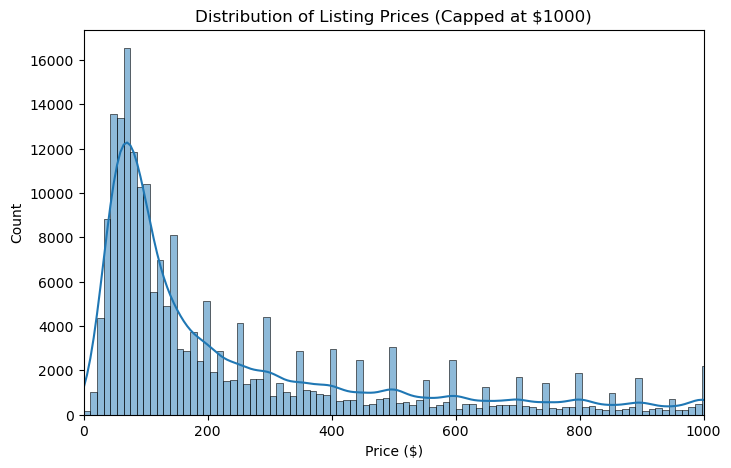

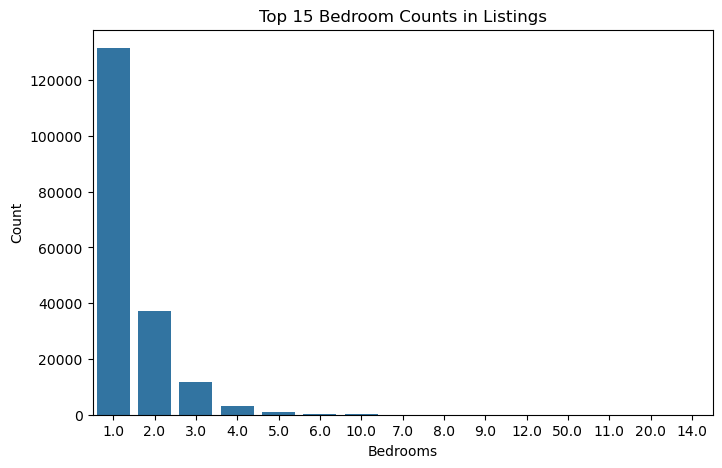

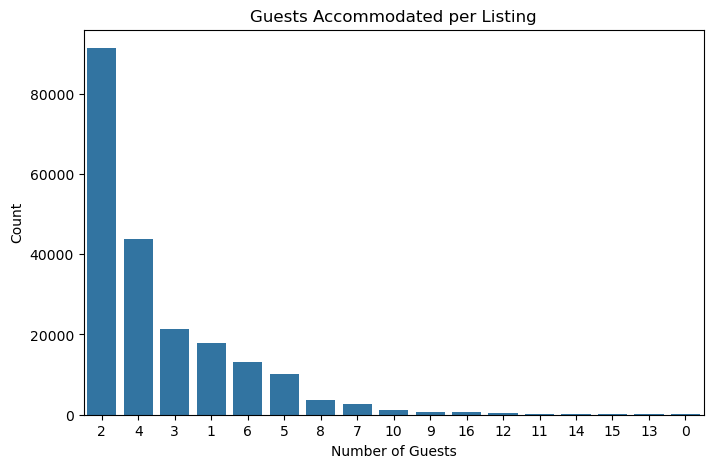

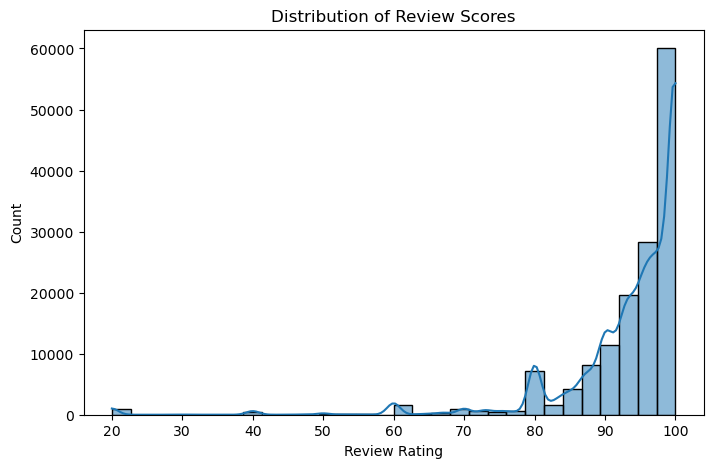

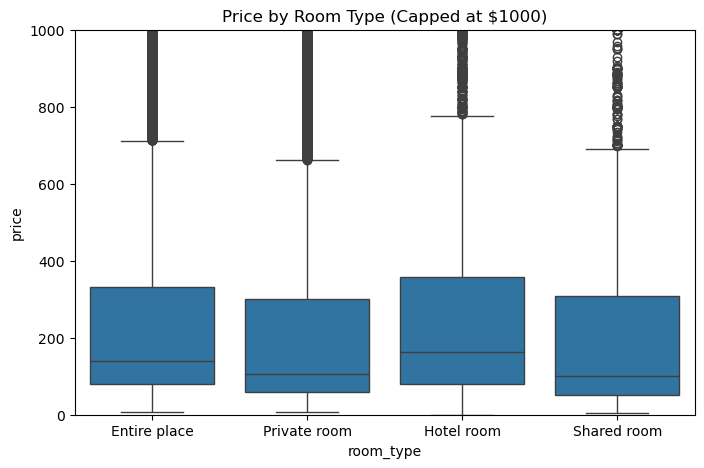

In [139]:
# ---- 1. Price Distribution ----
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 1000)   # focus on most listings (avoid outliers 600k+)
plt.title("Distribution of Listing Prices (Capped at $1000)")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

# ---- 2. Bedrooms Distribution ----
plt.figure(figsize=(8,5))
sns.countplot(x='bedrooms', data=df, order=df['bedrooms'].value_counts().index[:15])
plt.title("Top 15 Bedroom Counts in Listings")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.show()

# ---- 3. Accommodates Distribution ----
plt.figure(figsize=(8,5))
sns.countplot(x='accommodates', data=df, order=df['accommodates'].value_counts().index)
plt.title("Guests Accommodated per Listing")
plt.xlabel("Number of Guests")
plt.ylabel("Count")
plt.show()

# ---- 4. Review Scores ----
plt.figure(figsize=(8,5))
sns.histplot(df['review_scores_rating'].dropna(), bins=30, kde=True)
plt.title("Distribution of Review Scores")
plt.xlabel("Review Rating")
plt.ylabel("Count")
plt.show()

# ---- 5. Price by Room Type ----
plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='price', data=df)
plt.ylim(0, 1000)
plt.title("Price by Room Type (Capped at $1000)")
plt.show()

## EDA 2

In [140]:
# Can you spot any major differences in the Airbnb market between cities?

In [141]:
df['host_is_superhost'] = df['host_is_superhost'].map({'t': 1, 'f': 0}).fillna(0)

city_superhost_df = df[["city", "host_is_superhost"]].groupby(["city"]).agg({
    "host_is_superhost":"sum"
}).reset_index()

In [142]:
city_superhost_df.sort_values(by="host_is_superhost", ascending=False)

,city,host_is_superhost
6,Paris,7564.0
8,Rome,6971.0
4,Mexico City,4270.0
7,Rio de Janeiro,4129.0
9,Sydney,3837.0
5,New York,3665.0
3,Istanbul,2892.0
1,Cape Town,2306.0
0,Bangkok,1561.0
2,Hong Kong,509.0


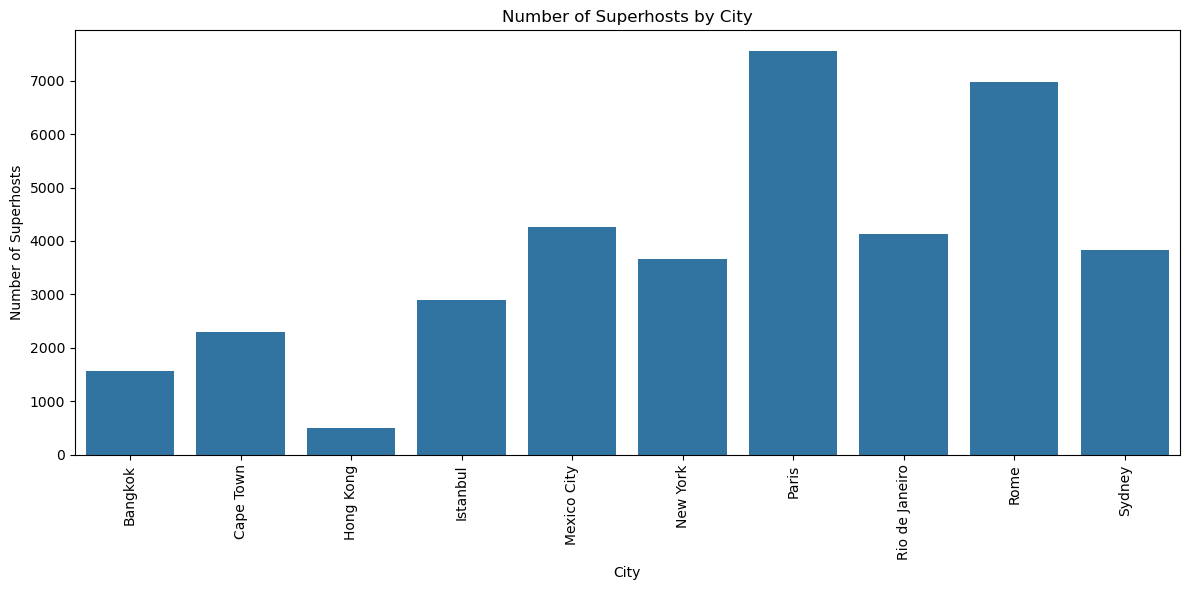

In [143]:
N = 10  # Change this to show more or fewer cities
plt.figure(figsize=(12,6))
sns.barplot(data=city_superhost_df.head(N), x="city", y="host_is_superhost")
plt.title("Number of Superhosts by City")
plt.xlabel("City")
plt.ylabel("Number of Superhosts")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the plot area
plt.show()

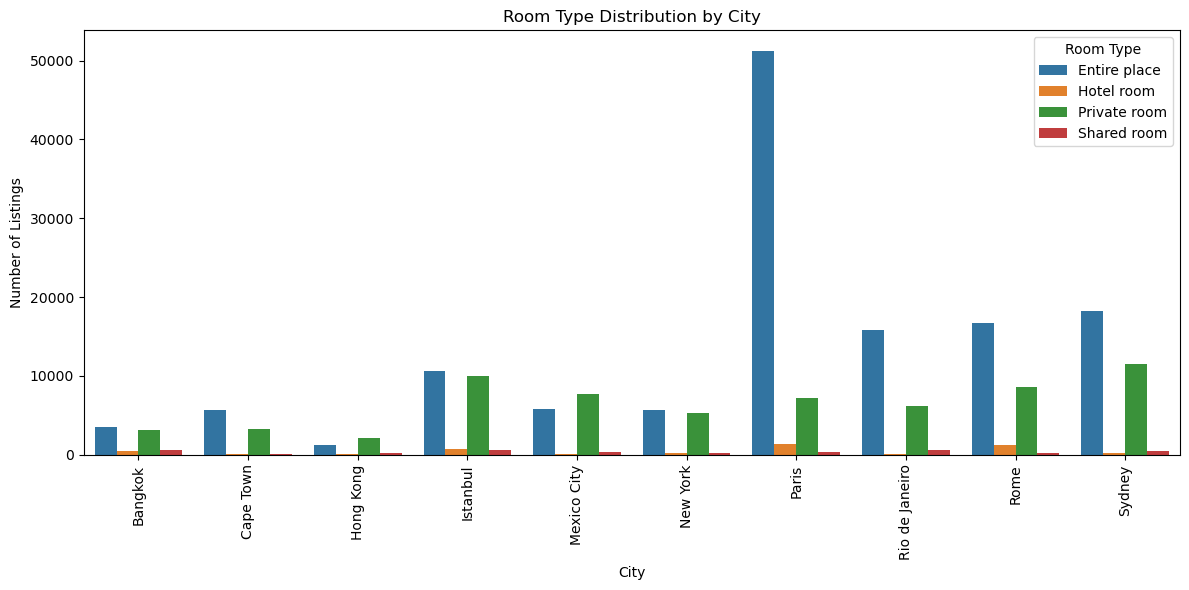

In [152]:
city_roomtype_df = df.groupby(["city", "room_type"]).size().reset_index(name="count")

plt.figure(figsize=(12,6))
sns.barplot(data=city_roomtype_df, x="city", y="count", hue="room_type")
plt.title("Room Type Distribution by City")
plt.xlabel("City")
plt.ylabel("Number of Listings")
plt.xticks(rotation=90)
plt.legend(title="Room Type")
plt.tight_layout()
plt.show()

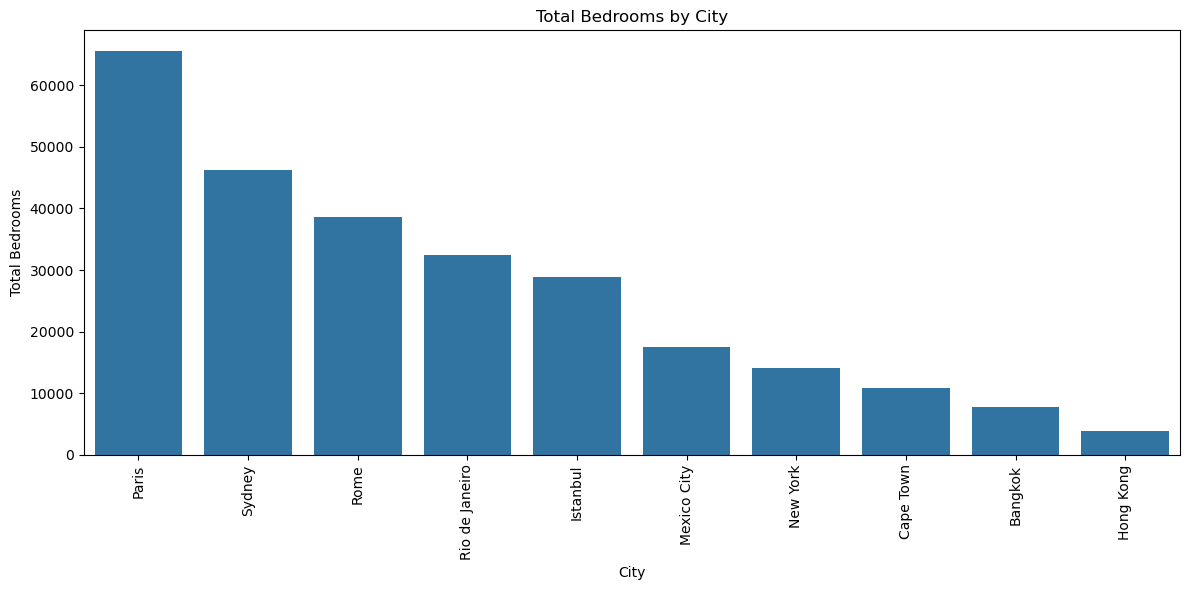

In [153]:
# Total bedrooms per city
city_bedrooms_df = df.groupby("city")["bedrooms"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=city_bedrooms_df.sort_values("bedrooms", ascending=False).head(10),
            x="city", y="bedrooms")
plt.title("Total Bedrooms by City")
plt.xlabel("City")
plt.ylabel("Total Bedrooms")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


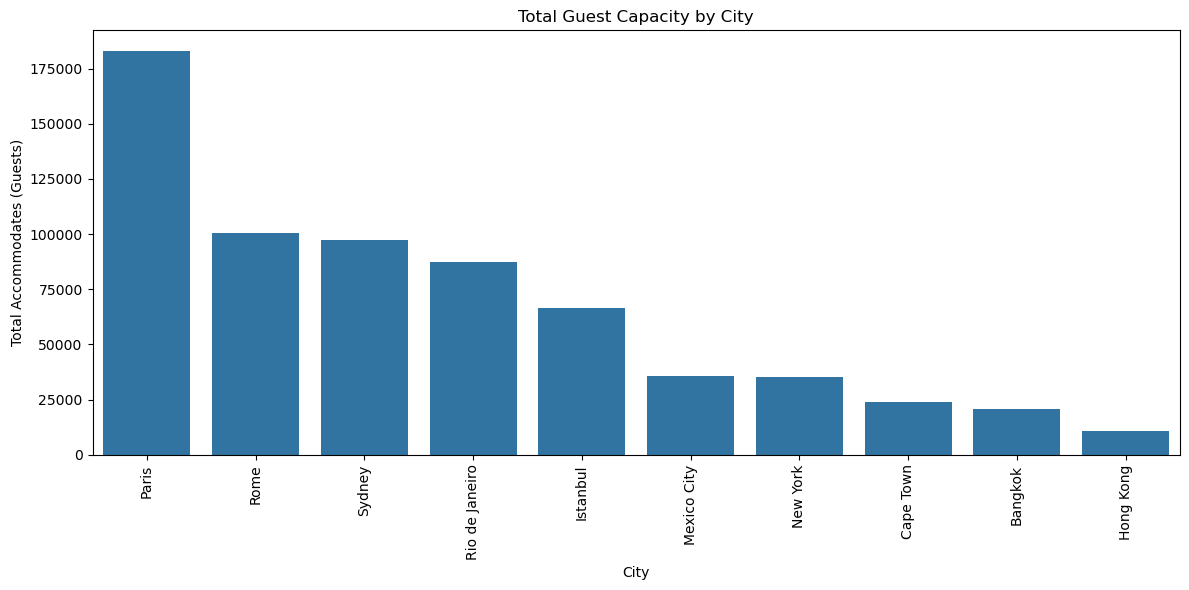

In [154]:
# Total accomodation per city
city_accommodates_df = df.groupby("city")["accommodates"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=city_accommodates_df.sort_values("accommodates", ascending=False).head(10),
            x="city", y="accommodates")
plt.title("Total Guest Capacity by City")
plt.xlabel("City")
plt.ylabel("Total Accommodates (Guests)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [156]:
# Cap minimum_nights at a reasonable threshold
df["minimum_nights"] = df["minimum_nights"].clip(lower=1, upper=366)

# Cap maximum_nights at 366
df["maximum_nights"] = df["maximum_nights"].clip(lower=1, upper=366)

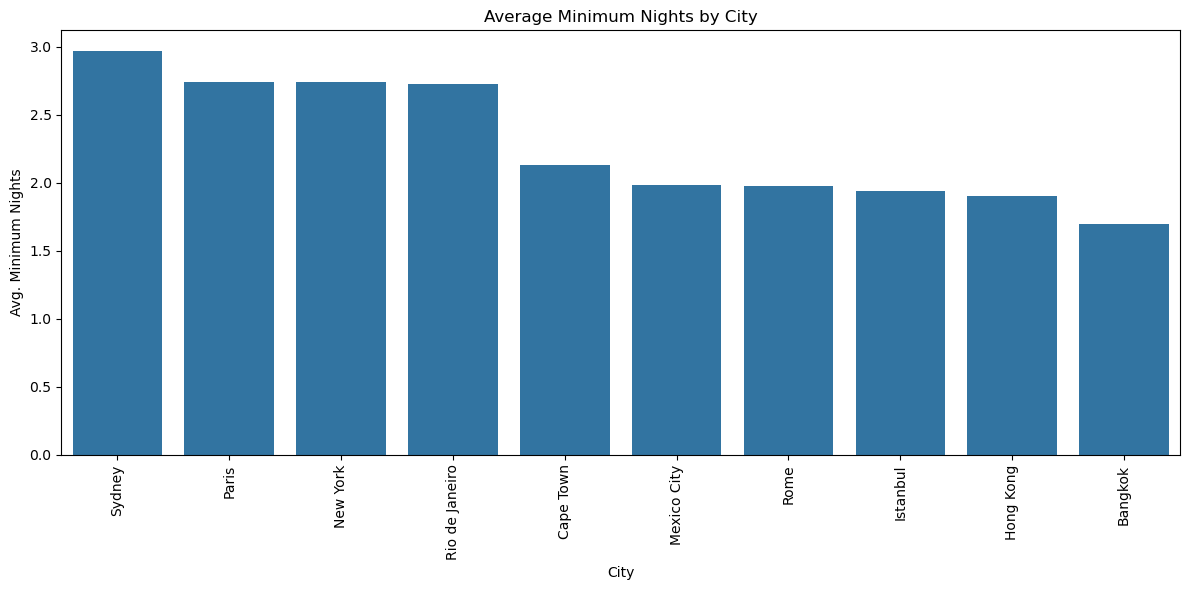

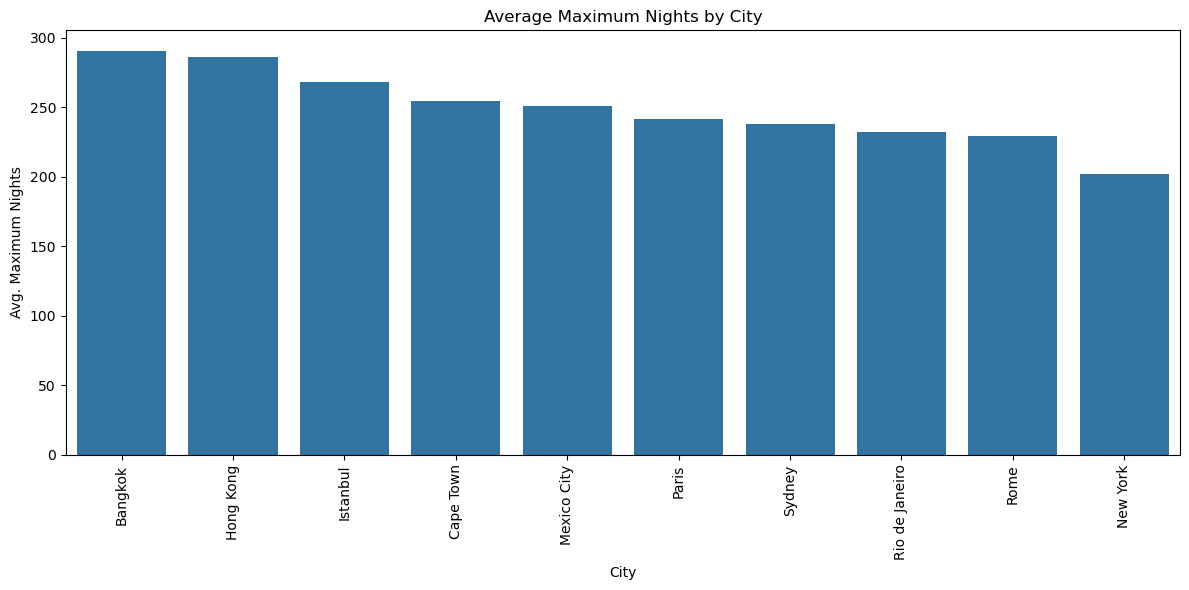

In [165]:
city_minnights_df = df.groupby("city")["minimum_nights"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=city_minnights_df.sort_values("minimum_nights", ascending=False).head(10),
            x="city", y="minimum_nights")
plt.title("Average Minimum Nights by City")
plt.xlabel("City")
plt.ylabel("Avg. Minimum Nights")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


city_maxnights_df = df.groupby("city")["maximum_nights"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=city_maxnights_df.sort_values("maximum_nights", ascending=False).head(10),
            x="city", y="maximum_nights")
plt.title("Average Maximum Nights by City")
plt.xlabel("City")
plt.ylabel("Avg. Maximum Nights")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Feature Engineering and importance to price

In [166]:
# Which attributes have the biggest influence in price?

In [174]:
df = df.dropna(subset=['host_is_superhost', 'host_total_listings_count'])

In [231]:
drop_cols_1 = ["listing_id", "name", "host_id",  "host_location", "reviewer_id", "district", "date"]
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

# initially working with non non cols
drop_cols_2 = ([
    "host_response_time", "host_response_rate", "host_acceptance_rate", 
    "bedrooms", "review_scores_rating", "review_scores_accuracy", 
    "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication",
    "review_scores_location", "review_scores_value", "neighbourhood", "latitude",  "longitude"
])
df = df.drop(columns=[c for c in drop_cols_2 if c in df.columns])

X= df.drop(columns=["price"])
y= df["price"]

In [232]:
# Handling list of amenities
X["amenities"] = X["amenities"].astype(str)
X["amenities_count"] = X["amenities"].apply(lambda x: len(x.replace("[","").replace("]","").replace("\"","").replace("\'","").split(",")))
X = X.drop(columns=["amenities"])

# Handling Host_since "YYYY-MM-DD"
NO_OF_DAYS_IN_YEAR = 365
# YEAR_OF_AIRBNB_START = 2008
X["host_since"] = pd.to_datetime(X["host_since"], errors="coerce")
today = pd.to_datetime("today")
X["host_expericence_years"] = (today - X["host_since"]).dt.days // NO_OF_DAYS_IN_YEAR
X = X.drop(columns=["host_since"])

In [228]:
# X['host_is_superhost'] = X['host_is_superhost'].map({'t': 1, 'f': 0}).fillna(0)
X['host_has_profile_pic'] = X['host_has_profile_pic'].map({'t': 1, 'f': 0}).fillna(0)
X['host_identity_verified'] = X['host_identity_verified'].map({'t': 1, 'f': 0}).fillna(0)
X['instant_bookable'] = X['instant_bookable'].map({'t': 1, 'f': 0}).fillna(0)

In [ ]:
# Clustering listings using their Logitude and Latitude


In [ ]:
# Are you able to identify any trends or seasonality in the review data?

In [60]:
# Which city offers a better value for travel?